In [48]:
using ITensors
using ITensorTDVP
using PyCall
np = pyimport("numpy")


n = 10
s = siteinds("S=1/2", n)

#################
#
# Defining the model
#
#################

function TransverseIsing(n, h) #Transverse field Ising model
    os = OpSum()
    for j in 1:(n - 1)
        os += -1,"Sz", j, "Sz", j + 1 #ITensor includes the factor 1/2 for each operator
    end
    for j in 1:n
        os += -h,"Sx", j #Field along x
    end
    return os
end

function Sz(n) #
    os = OpSum()
    for j in 1:n
        os += +1,"Sz", j
    end
    return MPO(os, s)
end

##################
#
# Time Evolution
#
##################

nstep = 50
step = -0.1
psi0 = MPS(s, ["↑" for k in 1:n]) #Initial state
h = collect(0:0.033:1) 
Sz_t = zeros(nstep+1) #Stores the total magnetization at each time step
Sz_av = zeros(length(h)) #Stores the averaged magnetization values

for i in 1:length(h)
    
    psi_previous = psi0
    H = MPO(TransverseIsing(n, h[i]), s)
    
    for t in 1:nstep
    
        psi_current = tdvp(
          1im*H,
          psi_previous, 
          step;
          nsweeps=1,
          reverse_step=false,
          normalize=true,
          maxdim=30,
          cutoff=1e-10,
          outputlevel=1,
          solver_backend="exponentiate",
        )
        
        println(t)
        
        Sz_t[t] = inner(psi_current', Sz(n), psi_current)
        
        psi_previous = psi_current
    end
    
    Sz_av[i] = (1/(nstep*real(step)))*np.trapz(Sz_t, collect(0:real(step):nstep*real(step)))
        
end




After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.008
1
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.008
2
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.029
3
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.012
4
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.011
5
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.011
6
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.013
7
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.028
8
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.012
9
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.012
10
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.012
11
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.009
12
After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=-0.1 time=0.03
13
After sweep 1: maxlink

LoadError: InexactError: Float64(4.999909482941755 - 1.6653345369377348e-16im)

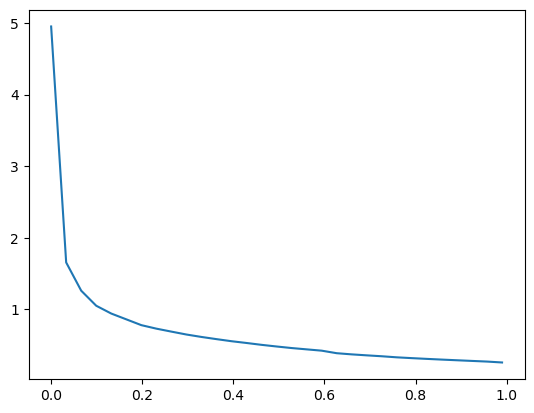

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f755ce1c0a0>

In [40]:
using PyPlot

plot(h, Sz_av)

In [29]:
psi_current

LoadError: UndefVarError: `psi_current` not defined

In [30]:
i

LoadError: UndefVarError: `i` not defined

In [38]:
imag(step)

0.1